<a href="https://colab.research.google.com/github/HARIS2003JULY/Artificial-intelligence-lab-work/blob/main/assignemnet2Datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (FIXED)
df = pd.read_csv("/content/property.csv")

# Preview data
df.head()


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,area_marla,price_per_marla
0,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,2018-10-06,Khan Estate,mohsinkhan and B,20.0,2.000000e+06
1,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,2019-07-03,Shahum Estate 2,"Babar Hameed, Raja Omar",9.0,1.055556e+06
2,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,2019-04-04,Unknown,Unknown,20.0,6.250000e+06
3,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,2019-04-04,Unknown,Unknown,11.0,1.909091e+06
4,785289,3102,https://www.zameen.com/Property/gulberg_paf_fa...,House,52000000,Gulberg,Lahore,Punjab,31.495909,74.350569,6,1 Kanal,For Sale,5,2019-06-02,MATZ Services,Group Captain (R) Tajammul Baig,20.0,2.600000e+06


In [2]:
#Data Quality Checks
df.info()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166434 entries, 0 to 166433
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   property_id      166434 non-null  int64  
 1   location_id      166434 non-null  int64  
 2   page_url         166434 non-null  object 
 3   property_type    166434 non-null  object 
 4   price            166434 non-null  int64  
 5   location         166434 non-null  object 
 6   city             166434 non-null  object 
 7   province_name    166434 non-null  object 
 8   latitude         166434 non-null  float64
 9   longitude        166434 non-null  float64
 10  baths            166434 non-null  int64  
 11  area             166434 non-null  object 
 12  purpose          166434 non-null  object 
 13  bedrooms         166434 non-null  int64  
 14  date_added       166434 non-null  object 
 15  agency           166434 non-null  object 
 16  agent            166434 non-null  obje

np.int64(0)

In [3]:
#Data Cleaning Steps
# Handle Missing Values
df['agency'].fillna("Unknown", inplace=True)
df['agent'].fillna("Unknown", inplace=True)


/tmp/ipython-input-835015497.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agency'].fillna("Unknown", inplace=True)
/tmp/ipython-input-835015497.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [5]:
# Fix Invalid Zero Values
df = df[df['price'] > 0]
df = df[df['bedrooms'] > 0]


In [6]:
#Convert Date Column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [7]:
#Data Transformation
# Convert Area to Numeric (Marla)
def area_to_marla(area):
    if "Kanal" in area:
        return float(area.split()[0]) * 20
    elif "Marla" in area:
        return float(area.split()[0])
    else:
        return np.nan

df['area_marla'] = df['area'].apply(area_to_marla)


ValueError: could not convert string to float: '4,450'

In [8]:
#Price per Marla
df['price_per_marla'] = df['price'] / df['area_marla']


In [9]:
#Data Summarization
df.describe()


,property_id,location_id,price,latitude,longitude,baths,bedrooms,date_added,area_marla,price_per_marla
count,1.664340e+05,166434.000000,1.664340e+05,166434.000000,166434.000000,166434.000000,166434.000000,166434,166427.000000,1.664270e+05
mean,1.569061e+07,4180.405296,1.674789e+07,29.979609,71.529831,3.286648,3.647127,2019-05-27 04:57:59.173726464,11.935385,inf
min,8.657500e+04,1.000000,1.000000e+00,11.052446,25.906027,0.000000,1.000000,2018-08-05 00:00:00,0.000000,5.000000e-02
25%,1.507454e+07,1242.000000,1.000000e+05,24.962736,67.140593,2.000000,3.000000,2019-05-06 00:00:00,5.000000,9.000000e+03
50%,1.673548e+07,3226.000000,7.800000e+06,31.462493,73.077793,3.000000,3.000000,2019-06-28 00:00:00,8.000000,1.517857e+06
75%,1.713637e+07,7079.000000,1.900000e+07,33.549693,74.257078,5.000000,5.000000,2019-07-10 00:00:00,12.000000,2.325000e+06
max,1.769386e+07,14231.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,2019-08-06 00:00:00,16000.000000,inf
std,2.253083e+06,3684.160475,3.294034e+07,3.664178,3.142254,2.328667,1.627543,NaN,85.358495,NaN


In [10]:
#City-wise Summary
df.groupby('city')['price'].mean().sort_values(ascending=False)


,price
city,
Karachi,1.975651e+07
Lahore,1.898545e+07
Islamabad,1.308762e+07
Faisalabad,9.672214e+06
Rawalpindi,8.900607e+06


In [11]:
#Property Type Count
df['property_type'].value_counts()



,count
property_type,
House,102814
Flat,36922
Upper Portion,15648
Lower Portion,9530
Room,845
Penthouse,351
Farm House,324


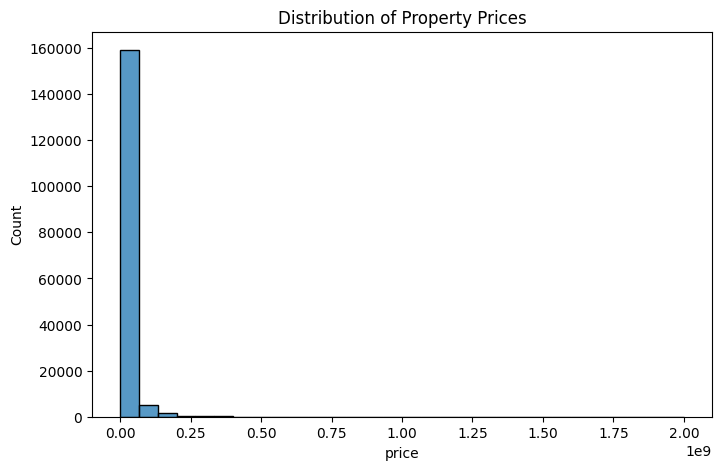

In [12]:
#Property Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30)
plt.title("Distribution of Property Prices")
plt.show()


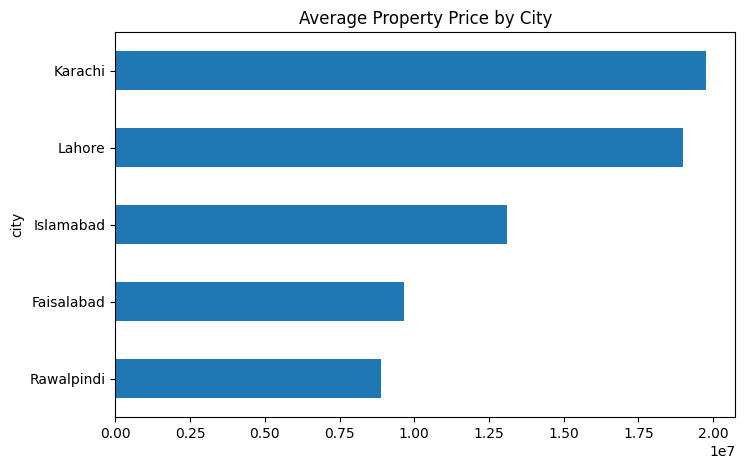

In [13]:
#Average Price by City
plt.figure(figsize=(8,5))
df.groupby('city')['price'].mean().sort_values().plot(kind='barh')
plt.title("Average Property Price by City")
plt.show()


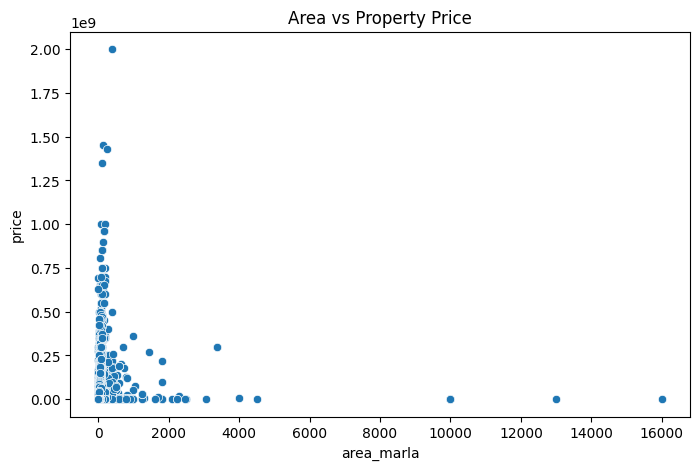

In [14]:
#Area vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='area_marla', y='price', data=df)
plt.title("Area vs Property Price")
plt.show()


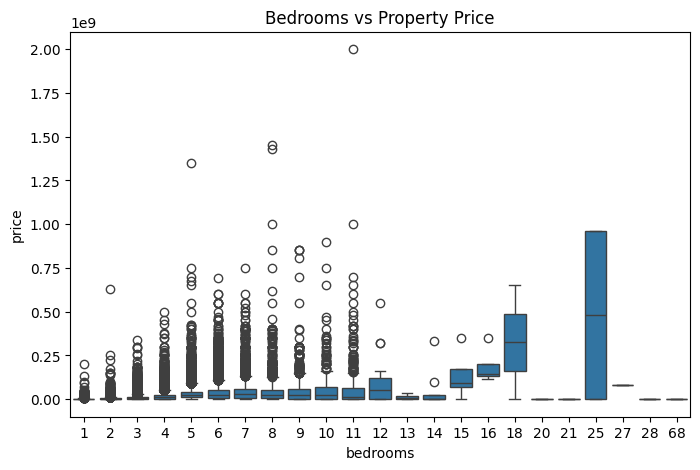

In [15]:
#Bedrooms vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title("Bedrooms vs Property Price")
plt.show()
